# Housing Price Prediction

In [1]:
#importing required libraries
import pandas as pd
import numpy as np

In [2]:
#loading train and test data sets
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
#checking first 5 rows in train data set
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
#checking first 5 rows in test data set
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [5]:
train_df.shape

(1168, 81)

In [6]:
test_df.shape

(292, 80)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

# Exploratory Data Analysis

<AxesSubplot:>

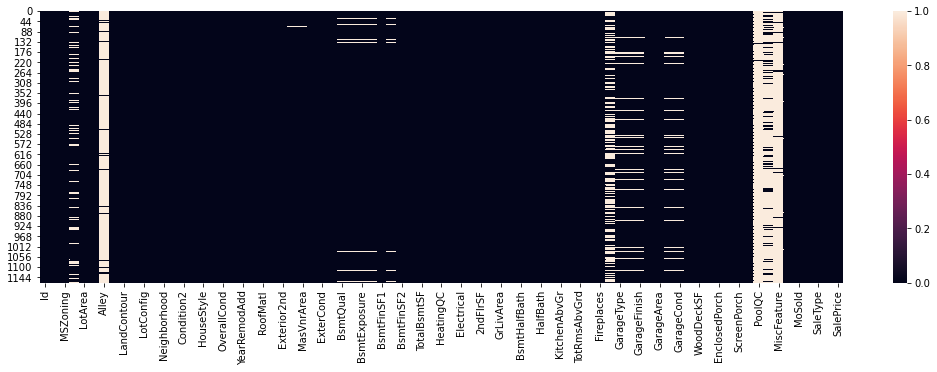

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (18,5))
sns.heatmap(train_df.isnull()) #Looking for null values if any, in heatmap

In [10]:
#dropping ID column 
train_df=train_df.drop(['Id'],axis=1)
test_df=test_df.drop(['Id'],axis=1)

In [11]:
#creating list for object and non object columns for train data sets
train_objcols=[]
train_numcols=[]
for col in train_df.columns:
    if (train_df[col].dtype=='object'):
          train_objcols.append(col)
    else:
        train_numcols.append(col)

In [12]:
#creating list for object and non object columns for test data sets
test_objcols=[]
test_numcols=[]
for col in test_df.columns:
    if (test_df[col].dtype=='object'):
          test_objcols.append(col)
    else:
        test_numcols.append(col)

In [13]:
#Replacing null values of object column with mode of it.
import numpy as np
collist=train_df.columns.values
for i in range(0,len(collist)):
    if train_df[collist[i]].dtype == "object":
        train_df[collist[i]].fillna(train_df[collist[i]].mode()[0], inplace=True)

In [14]:
#Replacing non object values i.e. int64 and float64 null values with mean of it.
import numpy as np
collist=train_df.columns.values
for i in range(0,len(collist)):
    if train_df[collist[i]].dtype != "object":
        train_df[collist[i]].fillna(train_df[collist[i]].mean(), inplace=True)

In [15]:
#Replacing null values of object column with mode of it.
import numpy as np
collist=test_df.columns.values
for i in range(0,len(collist)):
    if test_df[collist[i]].dtype == "object":
        test_df[collist[i]].fillna(test_df[collist[i]].mode()[0], inplace=True)

In [16]:
#Replacing non object values i.e. int64 and float64 null values with mean of it.
import numpy as np
collist=test_df.columns.values
for i in range(0,len(collist)):
    if test_df[collist[i]].dtype != "object":
        test_df[collist[i]].fillna(test_df[collist[i]].mean(), inplace=True)

<AxesSubplot:>

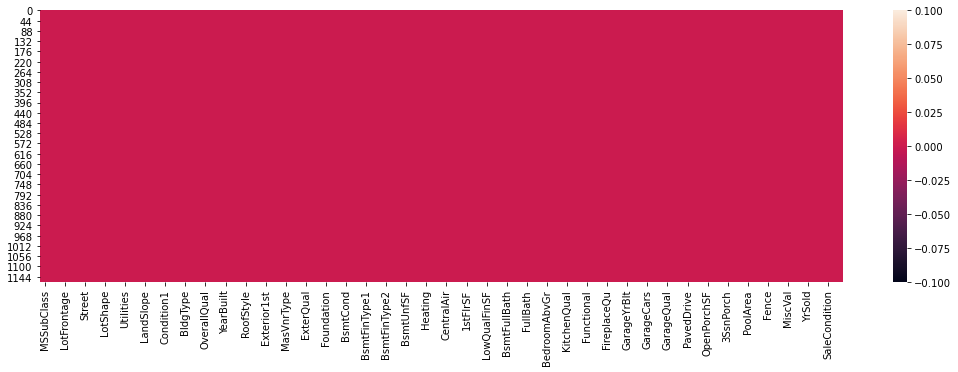

In [17]:
plt.figure(figsize = (18,5))
sns.heatmap(train_df.isnull()) #Looking for null values if any, in heatmap

In [18]:
pd.set_option('display.max_rows', None)
print(test_df.isnull().sum(axis = 0))

MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [19]:
test_df.drop('PoolQC',axis=1,inplace=True)

In [20]:
train_df.drop('PoolQC',axis=1,inplace=True)

<AxesSubplot:>

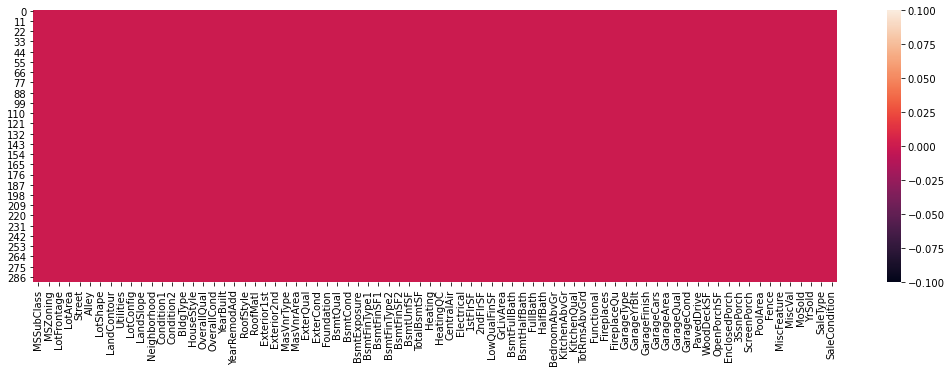

In [21]:
plt.figure(figsize = (18,5))
sns.heatmap(test_df.isnull()) #Looking for null values if any, in heatmap

In [22]:
# Converting years to age in train data
train_df['Year_SinceBuilt'] = train_df['YearBuilt'].max() - train_df['YearBuilt']
train_df['Year_SinceRemodAdded'] = train_df['YearRemodAdd'].max() - train_df['YearRemodAdd']
train_df['Yr_SinceSold'] = train_df['YrSold'].max() - train_df['YrSold']
train_df['GarageBlt_since'] = train_df['GarageYrBlt'].max() - train_df['GarageYrBlt']

# Dropping columns the existing columns
train_df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [23]:
# Converting years to age in test data
test_df['Year_SinceBuilt'] = test_df['YearBuilt'].max() - test_df['YearBuilt']
test_df['Year_SinceRemodAdded'] = test_df['YearRemodAdd'].max() - test_df['YearRemodAdd']
test_df['Yr_SinceSold'] = test_df['YrSold'].max() - test_df['YrSold']
test_df['GarageBlt_since'] = test_df['GarageYrBlt'].max() - test_df['GarageYrBlt']

# Dropping columns
test_df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [24]:
#As the data typeshave been modified,updating the list
#creating list for object and non object columns for test data sets
test_objcols=[]
test_numcols=[]
for col in test_df.columns:
    if (test_df[col].dtype=='object'):
          test_objcols.append(col)
    else:
        test_numcols.append(col)
#creating list for object and non object columns for train data sets
train_objcols=[]
train_numcols=[]
for col in train_df.columns:
    if (train_df[col].dtype=='object'):
          train_objcols.append(col)
    else:
        train_numcols.append(col)

# EXPLORATORY DATA ANALYSIS

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot:xlabel='ExterCond', ylabel='SalePrice'>

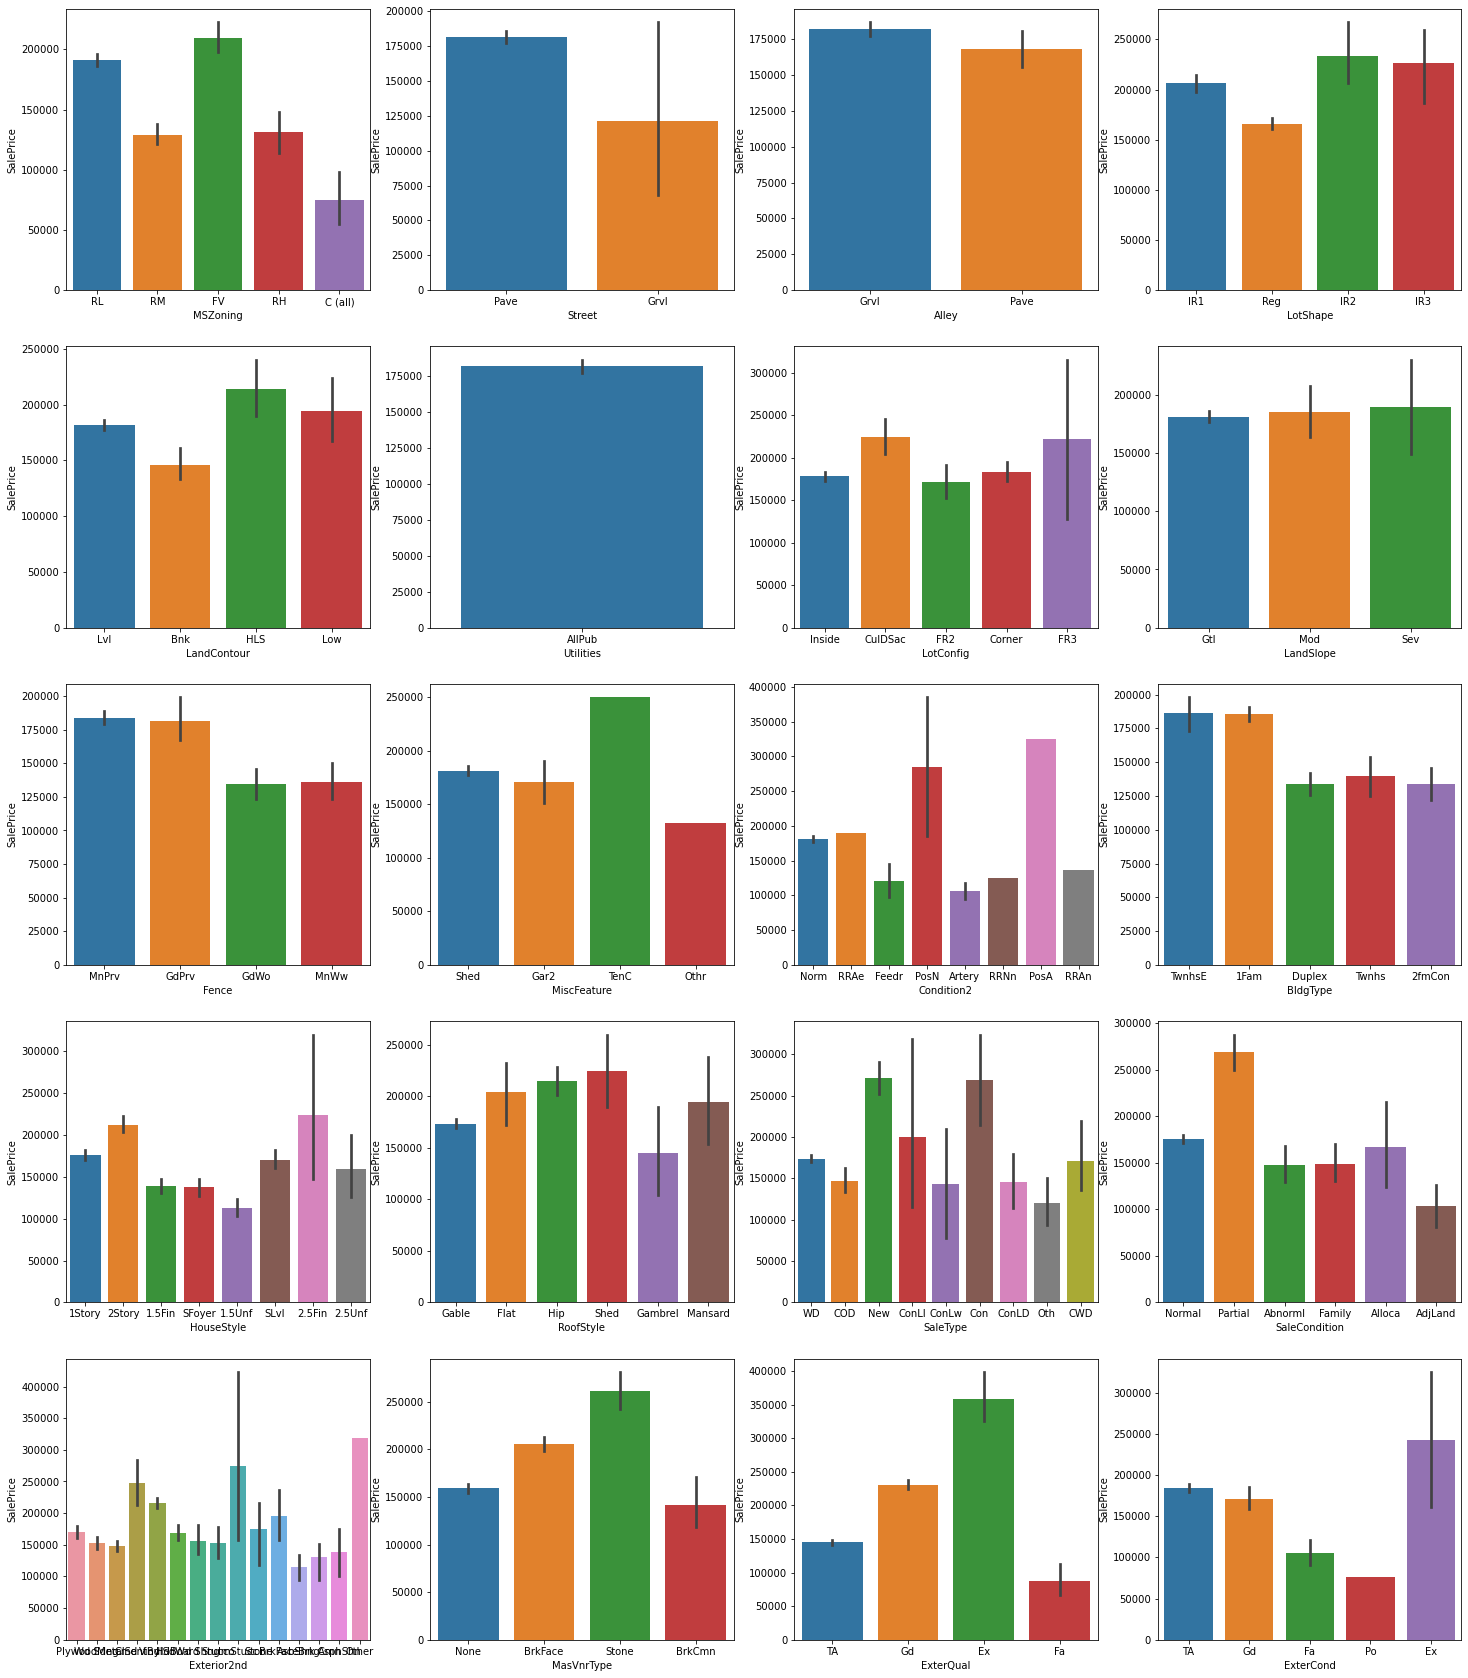

In [26]:
fig, ((ax1, ax2, ax3,ax4),(ax5, ax6,ax7,ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16),(ax17,ax18,ax19,ax20)) = plt.subplots(nrows=5, ncols=4, figsize = (25,30))

sns.barplot(x=train_df['MSZoning'],y=train_df['SalePrice'],ax=ax1)


sns.barplot(x=train_df['Street'],y=train_df['SalePrice'],ax=ax2)
sns.barplot(x=train_df['Alley'],y=train_df['SalePrice'],ax=ax3)
sns.barplot(x=train_df['LotShape'],y=train_df['SalePrice'],ax=ax4)
sns.barplot(x=train_df['LandContour'],y=train_df['SalePrice'],ax=ax5)

sns.barplot(x=train_df['Utilities'],y=train_df['SalePrice'],ax=ax6)
sns.barplot(x=train_df['LotConfig'],y=train_df['SalePrice'],ax=ax7)
sns.barplot(x=train_df['LandSlope'],y=train_df['SalePrice'],ax=ax8)
sns.barplot(x=train_df['Fence'],y=train_df['SalePrice'],ax=ax9)
sns.barplot(x=train_df['MiscFeature'],y=train_df['SalePrice'],ax=ax10)

sns.barplot(x=train_df['Condition2'],y=train_df['SalePrice'],ax=ax11)
sns.barplot(x=train_df['BldgType'],y=train_df['SalePrice'],ax=ax12)
sns.barplot(x=train_df['HouseStyle'],y=train_df['SalePrice'],ax=ax13)
sns.barplot(x=train_df['RoofStyle'],y=train_df['SalePrice'],ax=ax14)
sns.barplot(x=train_df['SaleType'],y=train_df['SalePrice'],ax=ax15)

sns.barplot(x=train_df['SaleCondition'],y=train_df['SalePrice'],ax=ax16)
sns.barplot(x=train_df['Exterior2nd'],y=train_df['SalePrice'],ax=ax17)
sns.barplot(x=train_df['MasVnrType'],y=train_df['SalePrice'],ax=ax18)
sns.barplot(x=train_df['ExterQual'],y=train_df['SalePrice'],ax=ax19)
sns.barplot(x=train_df['ExterCond'],y=train_df['SalePrice'],ax=ax20)

<AxesSubplot:xlabel='PavedDrive', ylabel='SalePrice'>

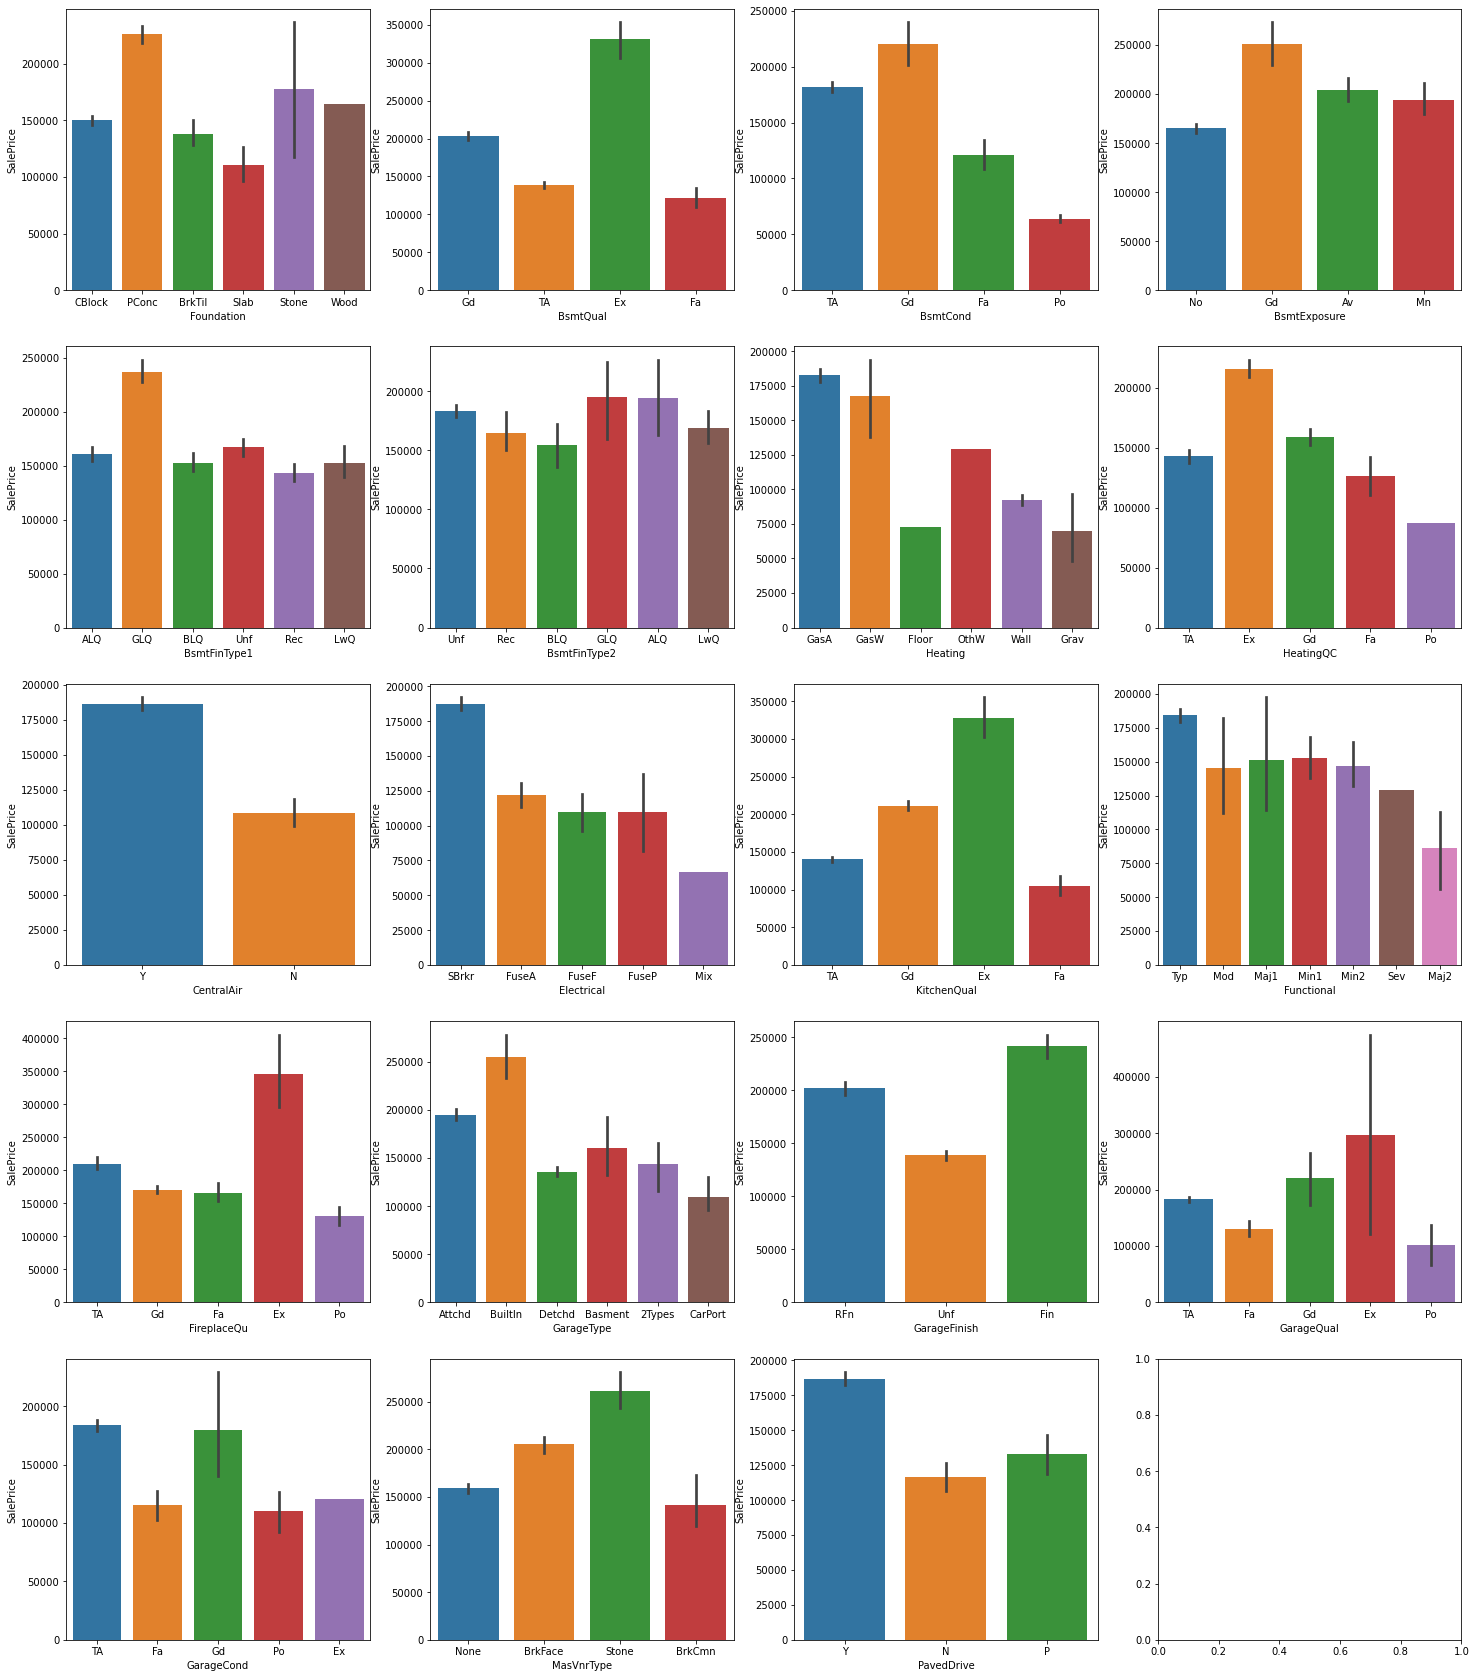

In [27]:
fig, ((ax1, ax2, ax3,ax4),(ax5, ax6,ax7,ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16),(ax17,ax18,ax19,ax20)) = plt.subplots(nrows=5, ncols=4, figsize = (25,30))
sns.barplot(x=train_df['Foundation'],y=train_df['SalePrice'],ax=ax1)


sns.barplot(x=train_df['BsmtQual'],y=train_df['SalePrice'],ax=ax2)
sns.barplot(x=train_df['BsmtCond'],y=train_df['SalePrice'],ax=ax3)
sns.barplot(x=train_df['BsmtExposure'],y=train_df['SalePrice'],ax=ax4)
sns.barplot(x=train_df['BsmtFinType1'],y=train_df['SalePrice'],ax=ax5)

sns.barplot(x=train_df['BsmtFinType2'],y=train_df['SalePrice'],ax=ax6)
sns.barplot(x=train_df['Heating'],y=train_df['SalePrice'],ax=ax7)
sns.barplot(x=train_df['HeatingQC'],y=train_df['SalePrice'],ax=ax8)
sns.barplot(x=train_df['CentralAir'],y=train_df['SalePrice'],ax=ax9)
sns.barplot(x=train_df['Electrical'],y=train_df['SalePrice'],ax=ax10)

sns.barplot(x=train_df['KitchenQual'],y=train_df['SalePrice'],ax=ax11)
sns.barplot(x=train_df['Functional'],y=train_df['SalePrice'],ax=ax12)
sns.barplot(x=train_df['FireplaceQu'],y=train_df['SalePrice'],ax=ax13)
sns.barplot(x=train_df['GarageType'],y=train_df['SalePrice'],ax=ax14)
sns.barplot(x=train_df['GarageFinish'],y=train_df['SalePrice'],ax=ax15)

sns.barplot(x=train_df['GarageQual'],y=train_df['SalePrice'],ax=ax16)
sns.barplot(x=train_df['GarageCond'],y=train_df['SalePrice'],ax=ax17)
sns.barplot(x=train_df['MasVnrType'],y=train_df['SalePrice'],ax=ax18)
sns.barplot(x=train_df['PavedDrive'],y=train_df['SalePrice'],ax=ax19)

Observation: 

    1)Floating Village Residential,Residential Low Density has high sales price and commercial buildings has less price

    2)properties with paved streets has high sales prices compared to gravel roads

    3)properties with paved alleys has high sales prices.

    4)regular shaped properties has less price moderately irregular properties has high prices

    5)hill side properties has high sales price

    6)the data we collected every building has all the utilities.

    7)properties with Cul-de-sac kind of lot configuration has high sale price

    8)properties with moderate to severe slope has high sale prices

    9) properties in Northridge,Northridge Heights,Stone Brook locations tops in sales prices

    10)properties within Within 200' of North-South Railroad has highest price followed by properties with Adjacency to postive off-site feature

    11)Townhouse Inside Unit,Single-family Detached type of properties has high sale prices

    12)Two and one-half story properties with 2nd level finished has high sale prices followed by 2 story buildings

    13)properties with shed type of roofs has high sale prices followed by hip and flat roofs.

    14)properties which just got constructed has high sale prices and properties with 15% Contract Down payment regular terms has also high sale prices.

    15)Homes that are partially constructed during last assessment has high sale prices.

    16)properties with stone type of Masonry veneers has high prices.

    17)properties with excellent exterior material quality and excellent exterior condition has higher sale prices.

    18)properties with poured concrete type of foundation has high sale prices.

    19)properties with basement height of 100+ inches has high sale price

    20)properties with good basement condition has higher sale price where as properties with poor basement condition has low price

    21)properties with good exposure to walkout or garden level walls has high sales price

    22)properties with Good Living Quarters has high sales prices

    23)properties with Gas forced warm air furnace and Gas hot water or steam heat has high sale prices.

    24)properties with ecellent heating conditions tend to have high prices

    25)properties with central air conditioning has high sales prices.

    26)properties with Standard Circuit Breakers & Romex has high sales values

    27)properties with excellent kitchen quality has high price.

    28)typical functioning homes has high sale price.

    29)properties with excellent fireplace quality has high price.

    30)properties with built in garages has high salesprice followed by attached garages.properties which do not have any garage has less sales price

    31)If the interior of garage is completely finished,those properties have high sale price

    32)properties with garages in good condition with excellent quality has high sale prices.

    33)properties with paved drive ways has high sales prices.

    34)properties with excellent pool quality has high prices

    35)properties with 2-STORY built in 1946 or NEWER has high sales prices.

<AxesSubplot:xlabel='MiscVal', ylabel='SalePrice'>

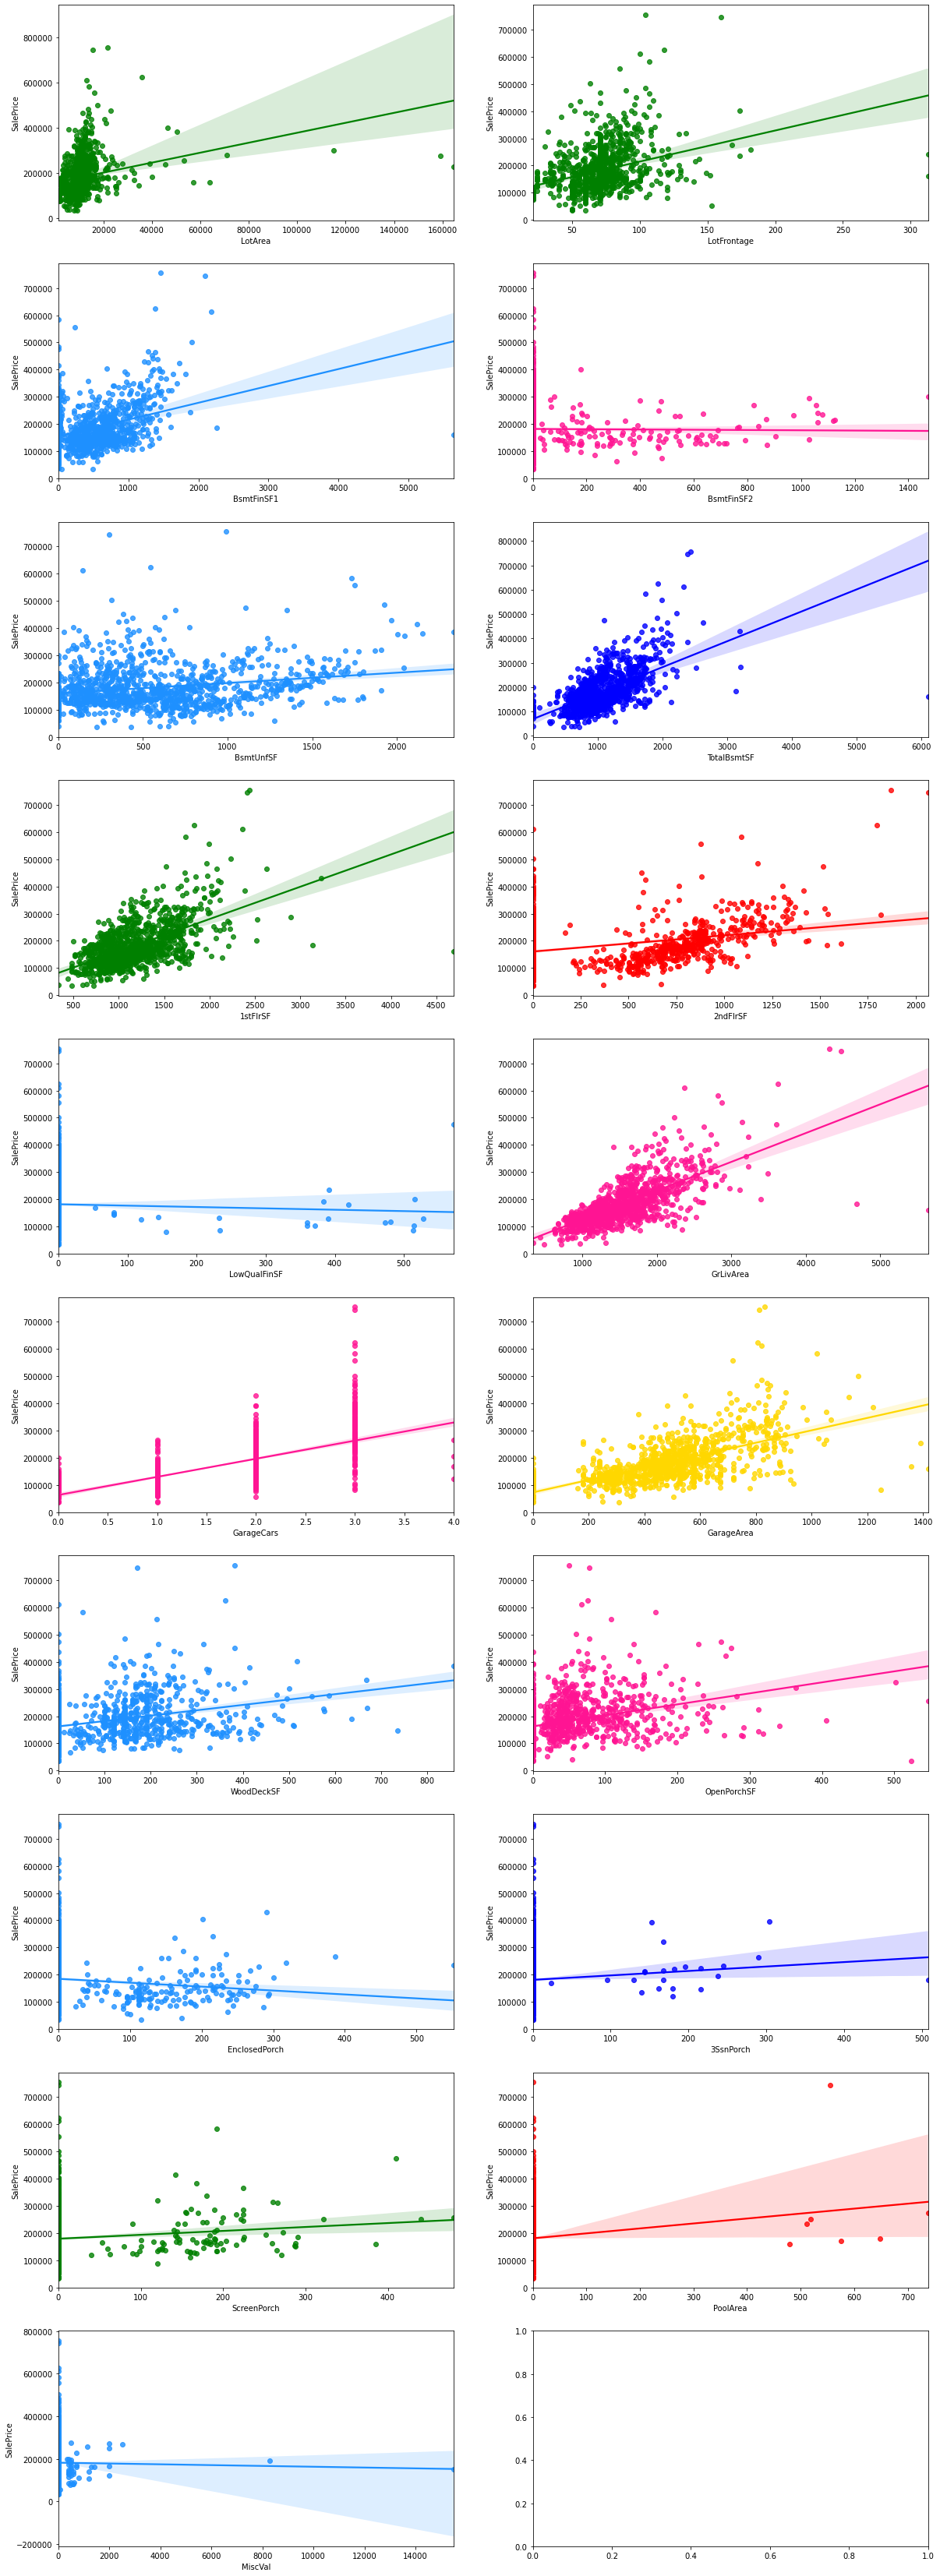

In [28]:
#checking  of numeric columns

fig, ((ax1, ax2), (ax3,ax4), (ax5, ax6),(ax7, ax8),( ax9,ax10),(ax11,ax12), (ax13, ax14),(ax15,ax16),(ax17,ax18),(ax19,ax20)) = plt.subplots(nrows=10, ncols=2, figsize = (20,60))



sns.regplot(x=train_df['LotArea'] , y=train_df['SalePrice'],color="g",ax=ax1)
sns.regplot(x=train_df['LotFrontage'] , y=train_df['SalePrice'],color="g",ax=ax2)

sns.regplot(x=train_df['BsmtFinSF1'] ,y=train_df['SalePrice'], color="dodgerblue",ax=ax3)
sns.regplot(x=train_df['BsmtFinSF2'] ,y=train_df['SalePrice'], color="deeppink",ax=ax4)
sns.regplot(x=train_df['BsmtUnfSF'] , y=train_df['SalePrice'],color="dodgerblue",ax=ax5)
sns.regplot(x=train_df['TotalBsmtSF'] , y=train_df['SalePrice'],color="b",ax=ax6)
sns.regplot(x=train_df['1stFlrSF'] , y=train_df['SalePrice'],color="g",ax=ax7)
sns.regplot(x=train_df['2ndFlrSF'] , y=train_df['SalePrice'],color="r",ax=ax8)
sns.regplot(x=train_df['LowQualFinSF'] , y=train_df['SalePrice'],color="dodgerblue",ax=ax9)
sns.regplot(x=train_df['GrLivArea'] , y=train_df['SalePrice'],color="deeppink",ax=ax10)
sns.regplot(x=train_df['GarageCars'] ,y=train_df['SalePrice'], color="deeppink",ax=ax11)
sns.regplot(x=train_df['GarageArea'] , y=train_df['SalePrice'],color="gold",ax=ax12)
sns.regplot(x=train_df['WoodDeckSF'] ,y=train_df['SalePrice'], color="dodgerblue",ax=ax13)
sns.regplot(x=train_df['OpenPorchSF'] , y=train_df['SalePrice'],color="deeppink",ax=ax14)
sns.regplot(x=train_df['EnclosedPorch'] , y=train_df['SalePrice'],color="dodgerblue",ax=ax15)
sns.regplot(x=train_df['3SsnPorch'] , y=train_df['SalePrice'],color="b",ax=ax16)
sns.regplot(x=train_df['ScreenPorch'] ,y=train_df['SalePrice'], color="g",ax=ax17)
sns.regplot(x=train_df['PoolArea'] , y=train_df['SalePrice'],color="r",ax=ax18)
sns.regplot(x=train_df['MiscVal'] , y=train_df['SalePrice'],color="dodgerblue",ax=ax19)

In [29]:
train_df.skew()

MSSubClass               1.422019
LotFrontage              2.710383
LotArea                 10.659285
OverallQual              0.175082
OverallCond              0.580714
MasVnrArea               2.834658
BsmtFinSF1               1.871606
BsmtFinSF2               4.365829
BsmtUnfSF                0.909057
TotalBsmtSF              1.744591
1stFlrSF                 1.513707
2ndFlrSF                 0.823479
LowQualFinSF             8.666142
GrLivArea                1.449952
BsmtFullBath             0.627106
BsmtHalfBath             4.264403
FullBath                 0.057809
HalfBath                 0.656492
BedroomAbvGr             0.243855
KitchenAbvGr             4.365259
TotRmsAbvGrd             0.644657
Fireplaces               0.671966
GarageCars              -0.358556
GarageArea               0.189665
WoodDeckSF               1.504929
OpenPorchSF              2.410840
EnclosedPorch            3.043610
3SsnPorch                9.770611
ScreenPorch              4.105741
PoolArea      

# Removing Outliers

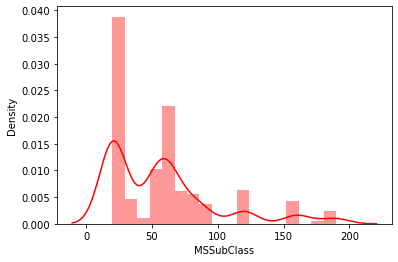

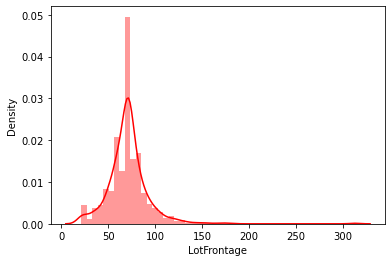

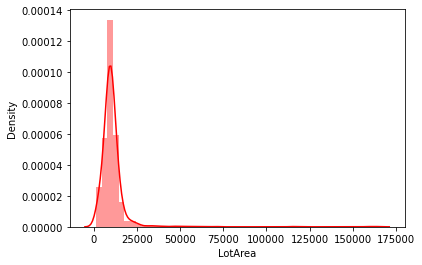

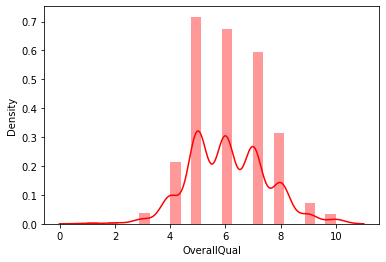

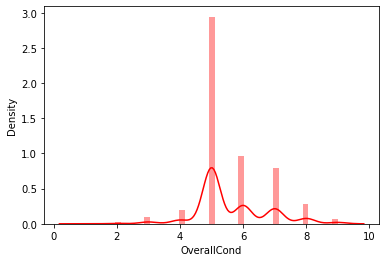

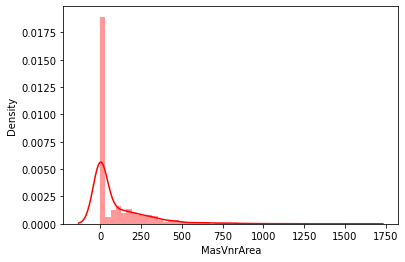

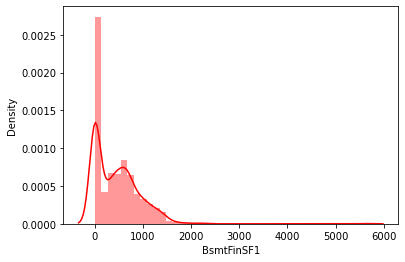

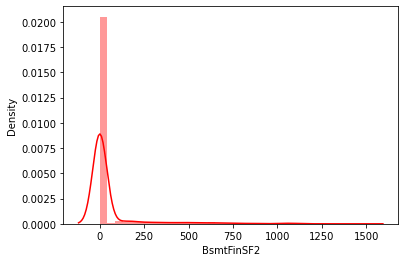

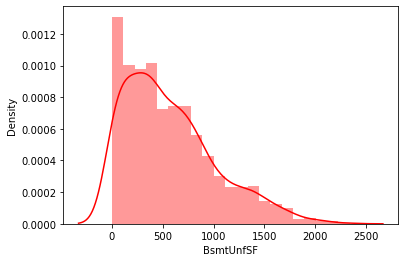

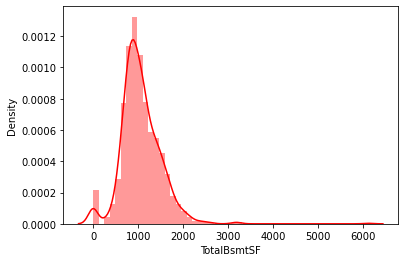

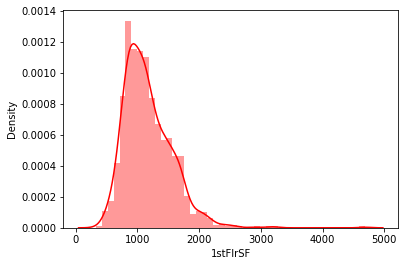

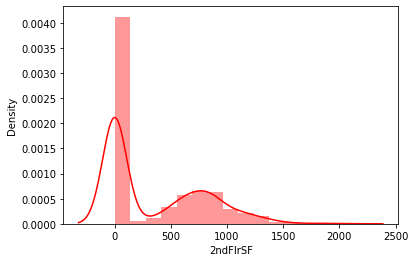

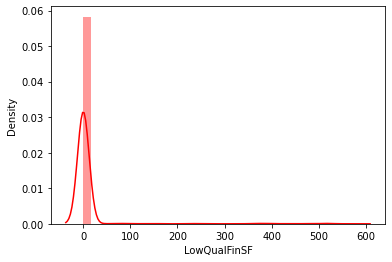

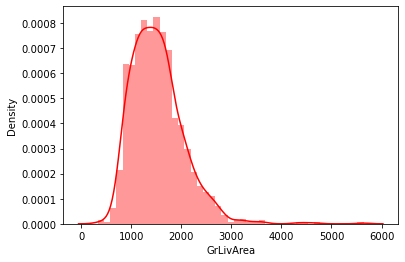

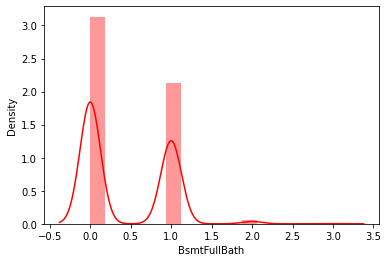

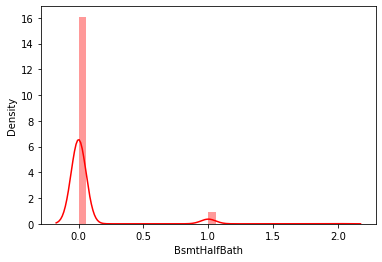

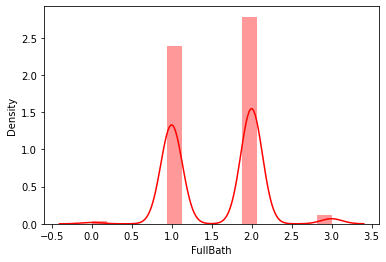

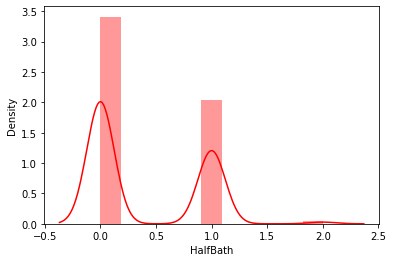

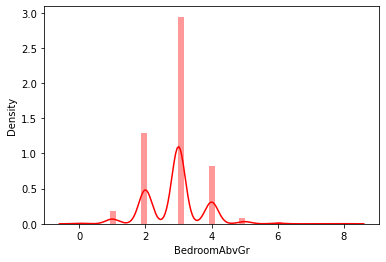

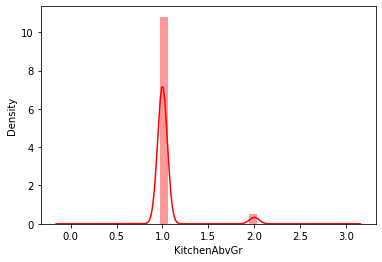

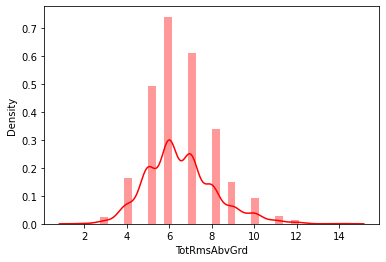

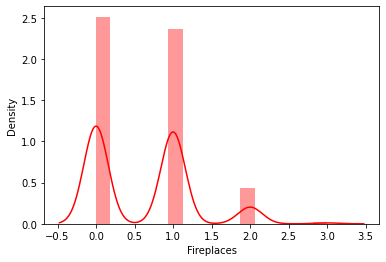

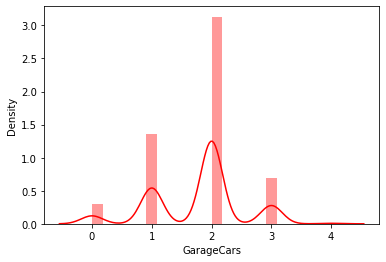

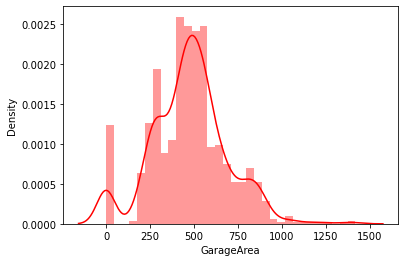

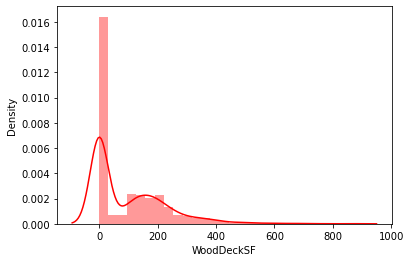

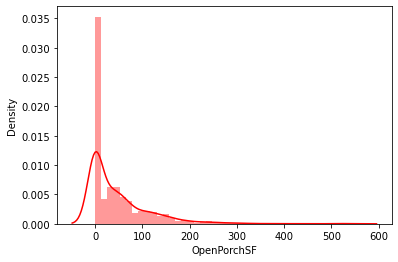

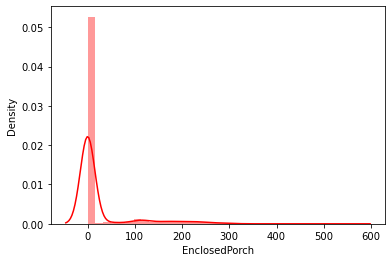

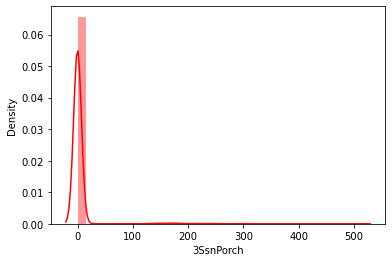

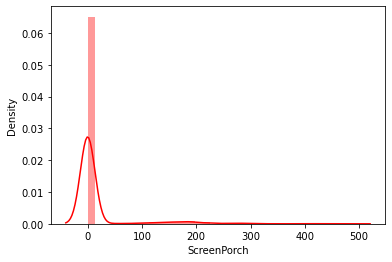

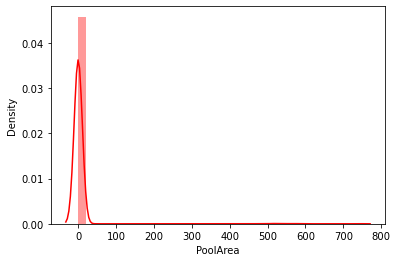

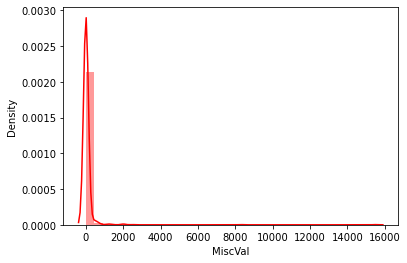

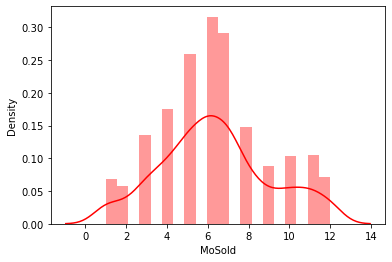

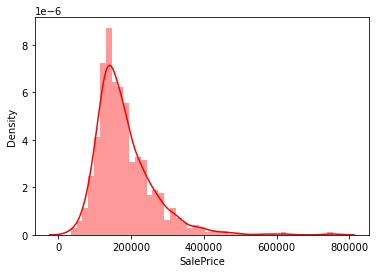

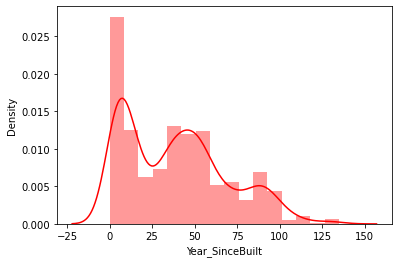

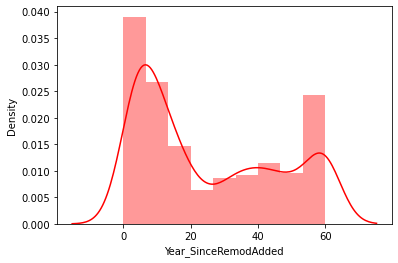

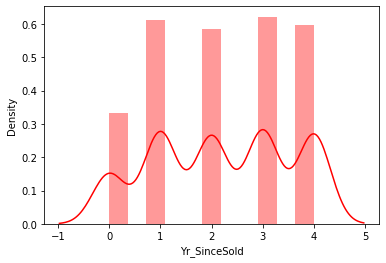

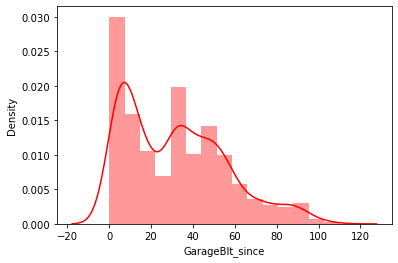

In [30]:
for i in train_df.describe().columns:
    sns.distplot(train_df[i],color='r')
    plt.show()

In [31]:
#treating skewness with square root and cube root method
for column in train_df.skew().index:
    if train_df[column].skew()>0.55:
        train_df[column]=np.sqrt(train_df[column])
    if train_df[column].skew()<-0.55:
        train_df[column]=np.cbrt(train_df[column])

In [32]:
#treating skewness with square root and cube root method
for column in test_df.skew().index:
    if test_df[column].skew()>0.55:
        test_df[column]=np.sqrt(test_df[column])
    if test_df[column].skew()<-0.55:
        test_df[column]=np.cbrt(test_df[column])

In [33]:
train_df.skew()

MSSubClass               0.757142
LotFrontage              0.541796
LotArea                  3.659306
OverallQual              0.175082
OverallCond              0.045434
MasVnrArea               1.075415
BsmtFinSF1              -0.011789
BsmtFinSF2               3.069103
BsmtUnfSF               -0.233752
TotalBsmtSF             -4.895100
1stFlrSF                 0.686774
2ndFlrSF                 0.425547
LowQualFinSF             7.716517
GrLivArea                0.627312
BsmtFullBath             0.391353
BsmtHalfBath             3.999260
FullBath                 0.057809
HalfBath                 0.517616
BedroomAbvGr             0.243855
KitchenAbvGr             2.709798
TotRmsAbvGrd             0.232956
Fireplaces               0.047671
GarageCars              -0.358556
GarageArea               0.189665
WoodDeckSF               0.458303
OpenPorchSF              0.606878
EnclosedPorch            2.306067
3SsnPorch                7.673448
ScreenPorch              3.308386
PoolArea      

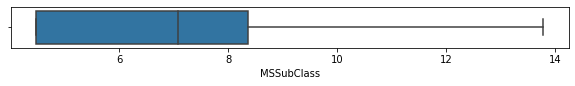

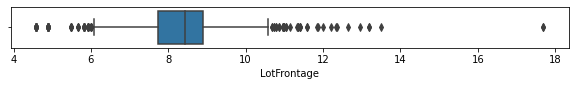

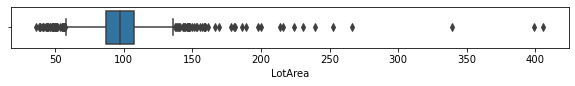

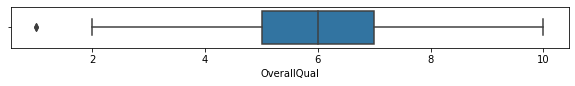

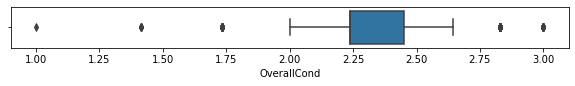

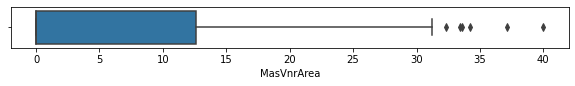

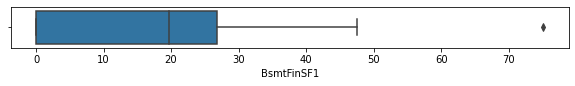

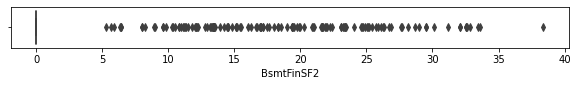

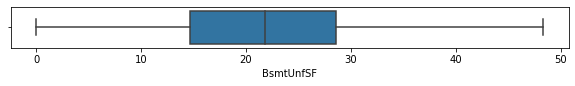

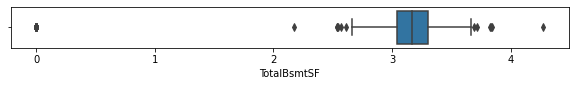

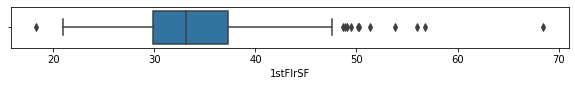

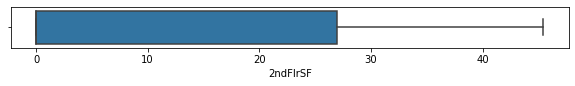

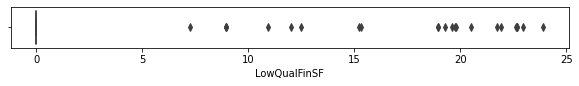

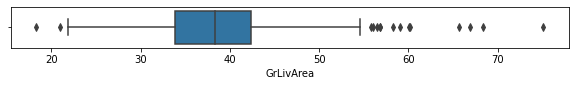

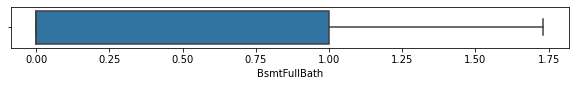

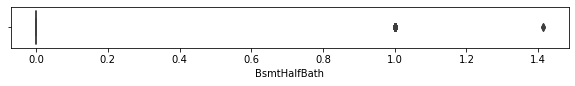

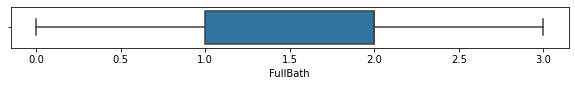

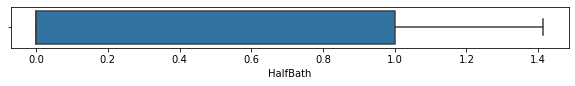

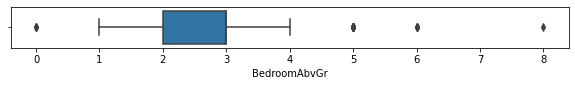

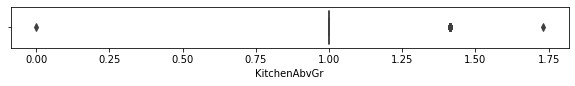

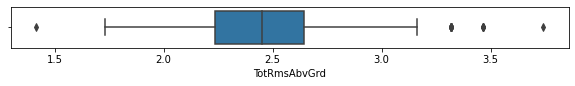

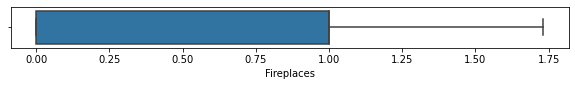

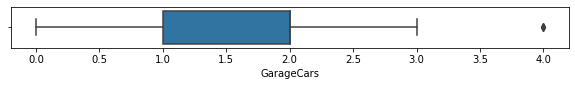

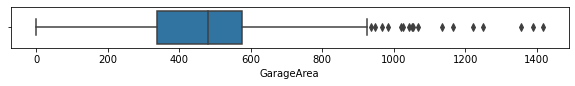

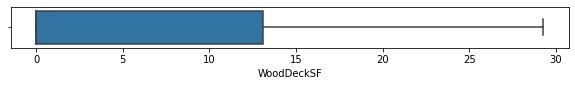

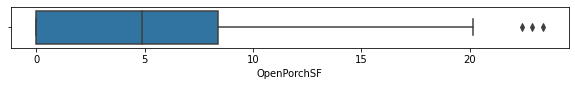

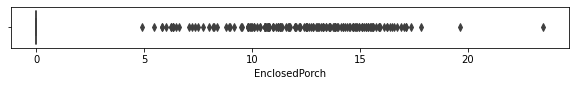

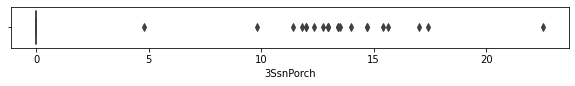

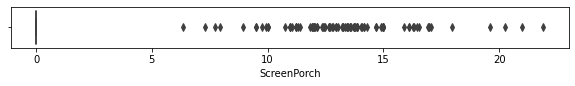

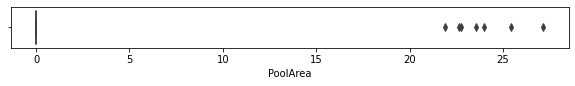

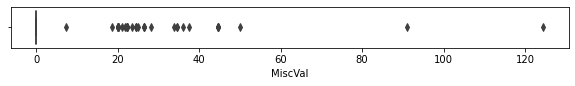

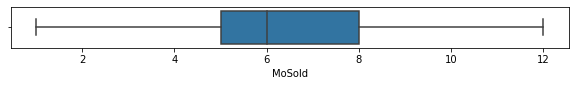

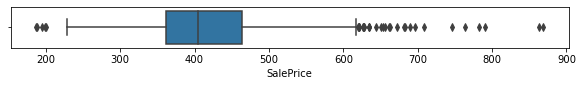

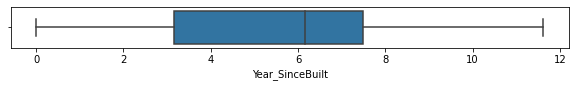

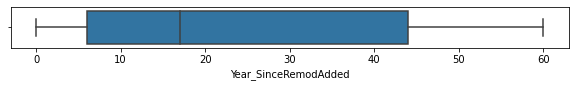

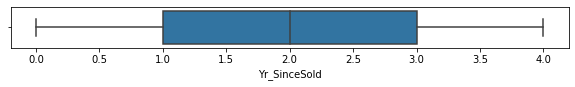

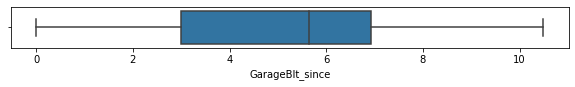

In [34]:
#checking the otlier with boxplot
df=train_df.columns
for i in df :
    if train_df[i].dtypes!="object":
        plt.figure(figsize=(10,8))
        plt.subplot(912)
        sns.boxplot(train_df[i])

In [35]:
#Making function to remove the outliers with IQR hypertuning
df=train_df.copy()
Q1=df.quantile(0.010)
Q3=df.quantile(0.99)
IQR=Q3-Q1
df_new=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
loss_=((len(df)-len(df_new))/len(df))*100
print(df_new.shape,df.shape)
print("Data Loss % is",loss_)

(1158, 79) (1168, 79)
Data Loss % is 0.8561643835616438


In [36]:
#Making function to remove the outliers with IQR hypertuning
df_test=test_df.copy()
Q1=df_test.quantile(0.010)
Q3=df_test.quantile(0.99)
IQR=Q3-Q1
df_test_new=df_test[~((df_test<(Q1-1.5*IQR))|(df_test>(Q3+1.5*IQR))).any(axis=1)]
loss_=((len(df_test)-len(df_test_new))/len(df_test))*100
print(df_test_new.shape,df_test.shape)
print("Data Loss % is",loss_)

(286, 78) (292, 78)
Data Loss % is 2.054794520547945


In [37]:
#label encoder
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
d=df_new.columns
for i in d:
    if df_new[i].dtypes=='object':
        df_new[i]=l.fit_transform(df_new[i])

In [38]:
#label encoder
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
d=df_test_new.columns
for i in d:
    if df_test_new[i].dtypes=='object':
        df_test_new[i]=l.fit_transform(df_test_new[i])

# Seperating Input and Output Variables

In [39]:
#lets split the data
df_x1=df_new.drop(columns='SalePrice',axis=1)
y=df_new[['SalePrice']]

# Removing Skewness

In [40]:
f=df_x1.columns
for i in f:
    if df_x1[i].dtypes!='object':
        if df_x1[i].skew()>0.55:
            df_x1[i]=np.sqrt(df_x1[i])

In [41]:
f=df_test_new.columns
for i in f:
    if df_test_new[i].dtypes!='object':
        if df_test_new[i].skew()>0.55:
            df_test_new[i]=np.sqrt(df_test_new[i])

# Scaling

In [42]:
#sacalling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(df_x1)
df_x=pd.DataFrame(x1,columns=df_x1.columns)
df_x.shape

(1158, 78)

In [43]:
#sacalling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
test_x1=sc.fit_transform(df_test_new)
df_test_x=pd.DataFrame(test_x1,columns=df_test_new.columns)
df_test_x.shape

(286, 78)

In [44]:
df_x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,Year_SinceBuilt,Year_SinceRemodAdded,Yr_SinceSold,GarageBlt_since
0,1.475337,-0.021739,0.090765,-1.163761,0.058874,-0.179124,-1.380049,0.318425,0.0,0.602180,...,0.253736,0.029399,-0.184133,-1.622342,0.330648,0.202447,0.060852,0.419780,0.612776,0.260380
1,-1.078535,-0.021739,1.170605,1.109582,0.058874,-0.179124,-1.380049,0.318425,0.0,0.602180,...,0.253736,0.029399,-0.184133,1.360861,0.330648,0.202447,0.248374,0.707814,0.612776,0.512832
2,0.349946,-0.021739,1.043825,0.116098,0.058874,-0.179124,-1.380049,0.318425,0.0,-1.229671,...,0.253736,0.029399,-0.184133,-0.130741,0.330648,0.202447,-0.732883,-0.588338,0.612776,-0.670661
3,-1.078535,-0.021739,1.579351,0.461108,0.058874,-0.179124,-1.380049,0.318425,0.0,0.602180,...,0.253736,0.029399,-0.184133,-1.995243,-4.593991,0.202447,0.028032,0.371774,-1.644684,0.260380
4,-1.078535,-0.021739,0.090765,1.216489,0.058874,-0.179124,-1.380049,0.318425,0.0,-0.619054,...,0.253736,0.029399,-0.184133,-0.130741,0.330648,0.202447,0.028032,-0.732355,-0.892197,0.260380


In [45]:
df_test_x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,Year_SinceBuilt,Year_SinceRemodAdded,Yr_SinceSold,GarageBlt_since
0,-1.050008,-0.28455,1.084720,0.937231,0.083918,-0.119098,-1.414641,-2.634245,-0.059235,-1.996938,...,0.210183,0.059235,-0.177036,0.288868,0.232823,0.150240,-1.234441,-1.020154,0.639702,-1.227074
1,1.423649,-0.28455,0.042170,-0.797809,0.083918,-0.119098,-1.414641,0.291557,-0.059235,-1.347195,...,0.210183,0.059235,-0.177036,0.651220,-6.425907,-3.287257,-0.124181,0.070553,-0.866098,0.041549
2,-1.050008,-0.28455,0.042170,0.556790,0.083918,-0.119098,0.737419,0.291557,-0.059235,0.602035,...,0.210183,0.059235,-0.177036,-0.073484,0.232823,0.150240,-0.927851,-0.772266,-0.866098,-0.888563
3,0.559959,-0.28455,0.498865,0.585102,0.083918,-0.119098,0.737419,-4.097147,-0.059235,0.602035,...,0.210183,0.059235,-0.177036,0.288868,0.232823,0.150240,1.077198,1.756190,-0.866098,1.462893
4,0.333606,-0.28455,1.084720,1.004191,0.083918,-0.119098,-1.414641,0.291557,-0.059235,-1.347195,...,0.210183,0.059235,-0.177036,-1.885243,0.232823,0.150240,-1.451233,-1.069731,-0.113198,-1.450413


# PCA

In [46]:
#pca
from sklearn.decomposition import PCA
cover_matrix=PCA(n_components=len(df_x.columns))
cover_matrix.fit(df_x)

PCA(n_components=78)

In [47]:
#pca
from sklearn.decomposition import PCA
cover_matrix=PCA(n_components=len(df_test_x.columns))
cover_matrix.fit(df_test_x)

PCA(n_components=78)

In [48]:
pc=PCA(n_components=20)
x1=pc.fit_transform(df_x)
df_x=pd.DataFrame(x1)

In [49]:
pc=PCA(n_components=20)
test_x1=pc.fit_transform(df_test_x)
df_test_x=pd.DataFrame(test_x1)

In [50]:
df_x.shape

(1158, 20)

In [51]:
df_test_x.shape

(286, 20)

# Finding Best Random State

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(df_x,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    score = r2_score(y_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.9035933901245838  on Random_state  518


# Train Test Split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(df_x,y,test_size=.30,random_state=maxRS)

# Finding Best Algorithm

In [54]:
#importing all the required libraries to find best Algorithm
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [55]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]
for m in model:
    print("*******************************************************************************")
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print('accuracy score of ->', m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred)))
    score=cross_val_score(m,df_x,y,cv=8)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,pred)-abs(score.mean()))
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print("*******************************************************************************")

*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> LinearRegression()
R2 Score:                 0.9035933901245838
Mean Absolute Error:      19.724726993961642
Mean Squared error:       708.093387227545
Root Mean Squared Error:  26.610024186902667
[0.90066456 0.88748742 0.80942802 0.85192765 0.86650018 0.86863647
 0.84668113 0.84527333]
cross validation score:   0.8595748453826281
Difference between R2 score and cross validatio score is -  0.04401854474195577
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
*******************************************************************************
*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> RandomForestRegressor()
R2 Score:                 0.8809753387440

Random Forest Regressor have the heighst R2 Score and cross validation Score i.e. 85.18%

# Hyper Parameter Tuning

In [56]:
#import the randomized search CV
from sklearn.model_selection import RandomizedSearchCV
parameters = {"n_estimators":[100,200,300,400,500,600,700,800],
              "max_depth":[1,2,3,4,5,6,7,8,9,10,15,20],
              "max_features": [3,5,7,9],
              "min_samples_leaf":[2,3,4,5,6],
              "max_features":['auto','sqrt'],
              "min_samples_split":[2,5,8,10,12,18]}

In [57]:
clf = RandomizedSearchCV(RandomForestRegressor(), parameters, cv=8)
clf.fit(x_train, y_train)
clf.best_params_  #Best parameters

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 9}

In [58]:
clf_pred = clf.best_estimator_.predict(x_test)

In [59]:
r2_score(y_test, clf_pred)

0.8797564020432361

# Saving the model

In [60]:
import joblib
joblib.dump(clf.best_estimator_,"Housing.obj")
RF_from_joblib=joblib.load('Housing.obj')
Predicted = RF_from_joblib.predict(x_test)

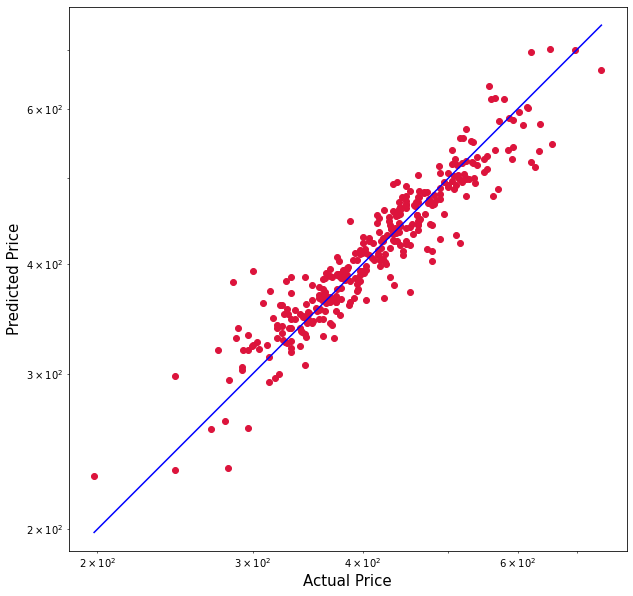

In [61]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, Predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Predicted), max(y_test.max(axis=1)))
p2 = min(min(Predicted), min(y_test.min(axis=1)))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Price', fontsize=15)
plt.ylabel('Predicted Price', fontsize=15)
plt.axis('equal')
plt.show()

# Predicting Test Dataset Input

In [62]:
Predicted = RF_from_joblib.predict(df_test_x)

In [63]:
Predicted

array([590.40203964, 446.14588057, 498.06671626, 355.50222516,
       499.77536452, 310.24971458, 456.01035534, 580.56051875,
       501.99474143, 492.30561473, 232.91477877, 373.74625606,
       336.98899476, 490.44869196, 575.07543844, 325.26258487,
       374.64483054, 348.23401137, 486.11639757, 439.44866216,
       330.95207618, 393.86511611, 383.4471586 , 292.66032845,
       304.09431109, 380.85993823, 423.07518002, 372.85174874,
       395.82273396, 308.23758003, 398.27323039, 459.92715549,
       474.34977591, 392.87756044, 297.95646416, 429.21150188,
       432.01226732, 357.69390651, 382.65830217, 406.51253327,
       326.273633  , 512.39579039, 457.99461404, 455.37883334,
       407.4430745 , 318.99499947, 334.31843125, 308.44751097,
       509.8285044 , 607.10363181, 370.42849098, 446.02283731,
       327.97594074, 256.09993518, 500.76469736, 352.18842024,
       339.33974081, 446.32085006, 363.16686013, 503.09915669,
       349.56910005, 409.7273125 , 363.5819409 , 457.37